In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats 

In [3]:
#Import Seasonal Data
data_nas = pd.read_csv('./mef-data/data_compiled_gapfilled_seasonal.csv')
data = data_nas.dropna().reset_index(drop = True)
data.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S
0,Growing,1969,29.24,0.000425,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.37,3.05
1,Melt,1969,17.84,0.003362,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.81,5.18
2,Snow,1969,32.48,0.000684,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.36,6.22
3,Growing,1970,13.43,0.000056,421.914022,0.0,16.641304,2.030,1.420,0.30,0.91,1.22,2.74
4,Melt,1970,15.63,0.002491,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.81,5.18


In [4]:
#Shift dates forward for lag 1 plots
data = data.sort_values(['year', 'season'], ascending = [True, False]).reset_index(drop = True)
data_lag1 = data[1:].reset_index(drop = True)
data_lag1['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag1[col] = data[col]

In [5]:
#Shift dates forward for lag 2 plots
data_lag2 = data[2:].reset_index(drop = True)
data_lag2['shiftedSeason'] = data.season
for col in ['South_PCP', 'WTE', 'Snow_in', 'MEANC', 'd.15_S2E', 'd.15_S2S', 'd.76_S2E', 'd.76_S2S', 'd.137_S2E', 'd.137_S2S']:
    data_lag2[col] = data[col]

#### Single-lag plots

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\9747840.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag0.pdf',


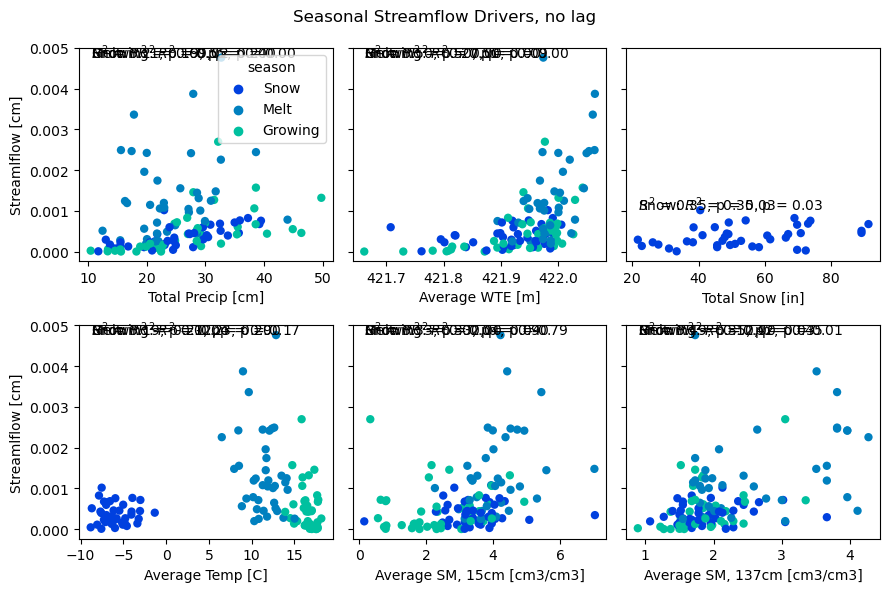

In [28]:
#Plots of seasonal variables affecting streamflow - no lags
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

def plotScatter(x, y, colors, label, axis, labels = False, shape = None):
    sns.scatterplot(x = x, y = y, hue = colors,
                    palette = 'winter',
                    linewidth = 0,
                    style = shape,
                    ax = axis, legend = labels)
    #axis.set_ylim(0, 0.005)
    axis.set_xlabel(label)
    _, _, r_value, p_value, _ = scipy.stats.linregress(x, y)
    axis.annotate(r"$R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(x), max(y)))
    for i in set(colors):
        temp_x = x[colors == i]
        temp_y = y[colors == i]
        if((len(temp_x) > 0)& (len(temp_y) > 0)):
            _, _, r_value, p_value, _ = scipy.stats.linregress(temp_x, temp_y)
            axis.annotate(i + r": $R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(x), max(y)))

plotScatter(data.South_PCP, data.qInterval, data.season, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data.WTE, data.qInterval, data.season, 'Average WTE [m]', ax[0, 1])
plotScatter(data.Snow_in[data.season == 'Snow'], data.qInterval[data.season == 'Snow'], data.season, 'Total Snow [in]', ax[0, 2])
plotScatter(data.MEANC, data.qInterval, data.season, 'Average Temp [C]', ax[1, 0])
plotScatter(data['d.15_S2E'], data.qInterval, data.season, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data['d.15_S2S'], data.qInterval, data.season,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data['d.137_S2E'], data.qInterval, data.season, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data['d.137_S2S'], data.qInterval, data.season, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, no lag')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag0.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\3078414245.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag1.pdf',


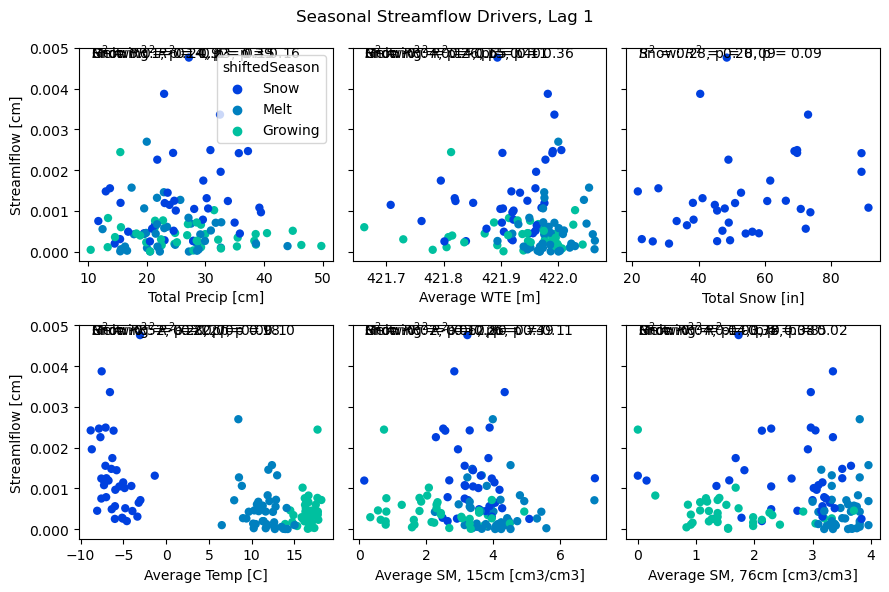

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag1.South_PCP, data_lag1.qInterval, data_lag1.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_lag1.WTE, data_lag1.qInterval, data_lag1.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag1.Snow_in[data_lag1.shiftedSeason == 'Snow'], data_lag1.qInterval[data_lag1.shiftedSeason == 'Snow'], data_lag1.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag1.MEANC, data_lag1.qInterval, data_lag1.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag1['d.15_S2E'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag1['d.15_S2S'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag1['d.76_S2E'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag1['d.76_S2S'], data_lag1.qInterval, data_lag1.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 1')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag1.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\288069713.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag2.pdf',


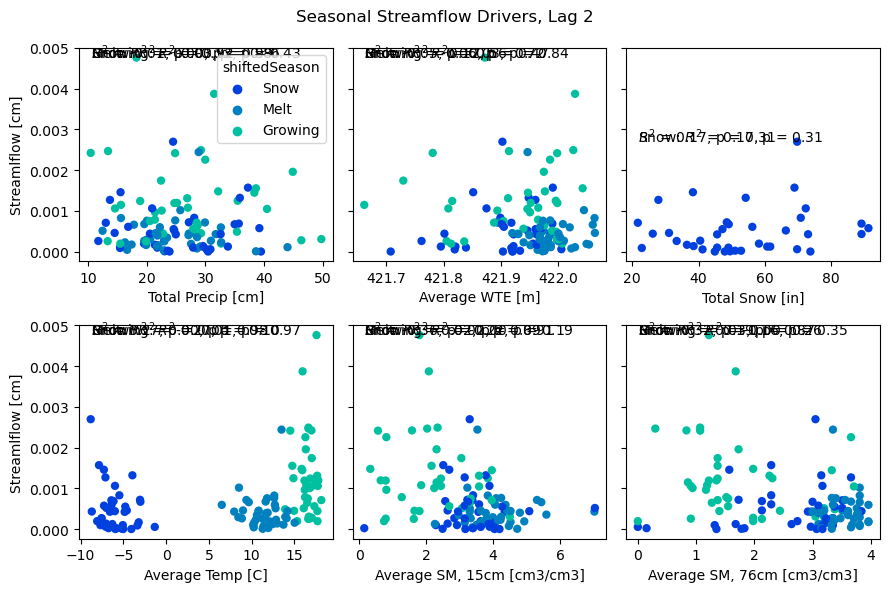

In [8]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_lag2.South_PCP, data_lag2.qInterval, data_lag2.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_lag2.WTE, data_lag2.qInterval, data_lag2.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_lag2.Snow_in[data_lag2.shiftedSeason == 'Snow'], data_lag2.qInterval[data_lag2.shiftedSeason == 'Snow'], data_lag2.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_lag2.MEANC, data_lag2.qInterval, data_lag2.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_lag2['d.15_S2E'], data_lag2.qInterval, data_lag2.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_lag2['d.15_S2S'], data_lag2.qInterval, data_lag2.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_lag2['d.76_S2E'], data_lag2.qInterval, data_lag2.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_lag2['d.76_S2S'], data_lag2.qInterval, data_lag2.shiftedSeason, 'Average SM, 76cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Lag 2')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_lag2.pdf', 
            bbox_to_inches = 'tight')

#### Multi-lag plots

In [9]:
#Merge lagged dataframes with an indicator column for lag
data['lag'] = 0
data['shiftedSeason'] = data.season
data_lag1['lag'] = 1
data_lag2['lag'] = 2

data_merged = pd.concat([data, data_lag1, data_lag2]).reset_index(drop = True)
data_merged

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,d.76_S2S,d.137_S2E,d.137_S2S,lag,shiftedSeason
0,Snow,1969,32.48,0.000684,421.993211,73.0,-6.568421,4.345,4.735,2.97,6.02,2.360,6.220,0,Snow
1,Melt,1969,17.84,0.003362,422.060119,1.5,9.660714,5.440,4.930,3.81,5.94,3.810,5.180,0,Melt
2,Growing,1969,29.24,0.000425,422.026154,0.0,16.637363,2.340,2.740,1.07,2.44,1.370,3.050,0,Growing
3,Snow,1970,30.85,0.000659,422.005343,69.7,-7.075980,3.895,4.650,2.97,4.88,2.665,4.345,0,Snow
4,Melt,1970,15.63,0.002491,422.063188,2.3,12.637681,3.840,5.610,3.81,6.25,3.810,5.180,0,Melt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Growing,2015,11.78,0.000259,421.761625,33.4,-7.575000,3.150,3.730,3.23,4.17,2.180,3.450,2,Snow
344,Snow,2016,29.92,0.000713,421.893982,2.3,9.380531,5.310,5.130,3.56,5.03,2.770,4.170,2,Melt
345,Melt,2016,28.52,0.000710,421.887935,0.0,18.141304,3.960,3.710,1.37,1.88,1.880,2.840,2,Growing
346,Growing,2016,34.97,0.000670,421.901638,49.1,-3.009887,3.250,5.640,3.00,4.22,3.020,4.720,2,Snow


C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\298333978.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_melt.pdf',


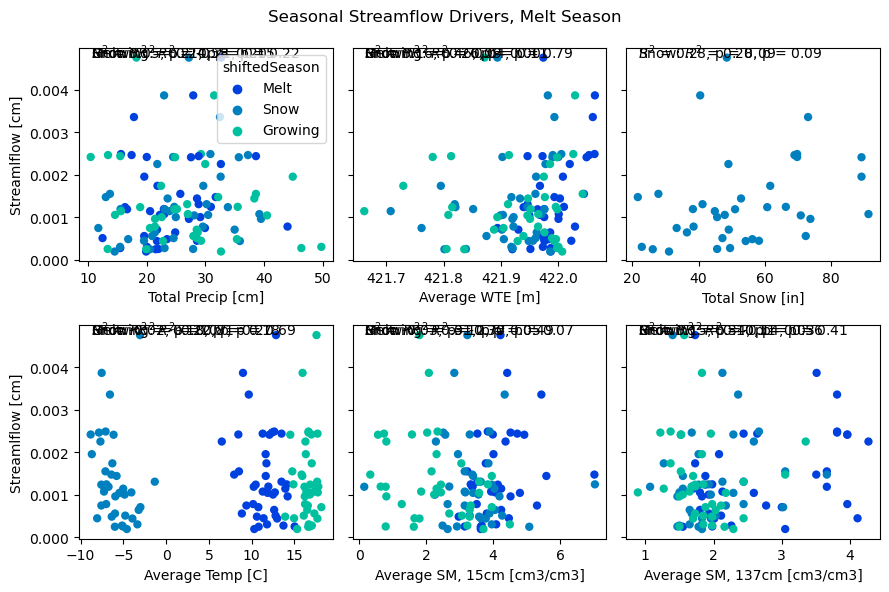

In [10]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_melt = data_merged[data_merged.season == 'Melt'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_melt.South_PCP, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_melt.WTE, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_melt.Snow_in[data_merged_melt.shiftedSeason == 'Snow'], data_merged_melt.qInterval[data_merged_melt.shiftedSeason == 'Snow'], data_merged_melt.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_melt.MEANC, data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_melt['d.15_S2E'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_melt['d.15_S2S'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_melt['d.137_S2E'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_melt['d.137_S2S'], data_merged_melt.qInterval, data_merged_melt.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Melt Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_melt.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\669188092.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_grow.pdf',


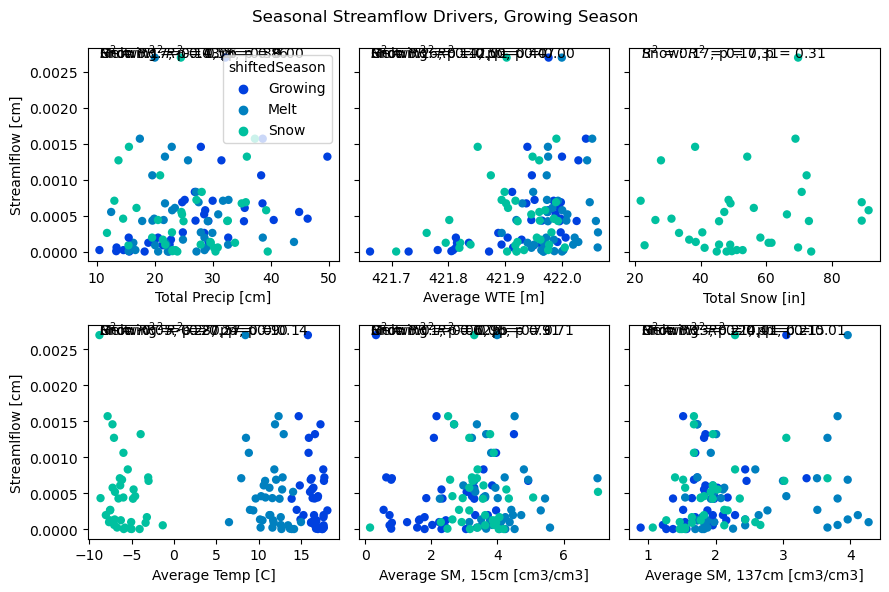

In [11]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_grow = data_merged[data_merged.season == 'Growing'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_grow.South_PCP, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_grow.WTE, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_grow.Snow_in[data_merged_grow.shiftedSeason == 'Snow'], data_merged_grow.qInterval[data_merged_grow.shiftedSeason == 'Snow'], data_merged_grow.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_grow.MEANC, data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_grow['d.15_S2E'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_grow['d.15_S2S'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_grow['d.137_S2E'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_grow['d.137_S2S'], data_merged_grow.qInterval, data_merged_grow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Growing Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_grow.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\386081141.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_snow.pdf',


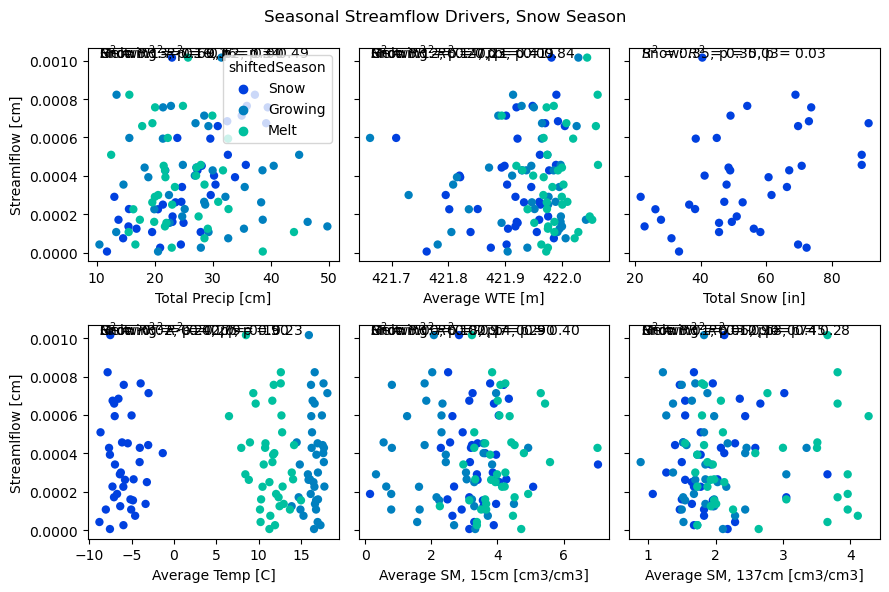

In [12]:
#Plots of seasonal variables affecting streamflow - melt season multilag
data_merged_snow = data_merged[data_merged.season == 'Snow'].reset_index(drop = True)

fig, ax = plt.subplots(2, 3, figsize = (9, 6), 
                       sharey = True,
                       layout = 'tight')

plotScatter(data_merged_snow.South_PCP, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Total Precip [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_snow.WTE, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average WTE [m]', ax[0, 1])
plotScatter(data_merged_snow.Snow_in[data_merged_snow.shiftedSeason == 'Snow'], data_merged_snow.qInterval[data_merged_snow.shiftedSeason == 'Snow'], data_merged_snow.shiftedSeason, 'Total Snow [in]', ax[0, 2])
plotScatter(data_merged_snow.MEANC, data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average Temp [C]', ax[1, 0])
plotScatter(data_merged_snow['d.15_S2E'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 15cm [cm3/cm3]', ax[1, 1])
#plotScatter(data_merged_snow['d.15_S2S'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason,'Average SM, 15cm [cm3/cm3]', ax[1, 1])
plotScatter(data_merged_snow['d.137_S2E'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])
#plotScatter(data_merged_snow['d.137_S2S'], data_merged_snow.qInterval, data_merged_snow.shiftedSeason, 'Average SM, 137cm [cm3/cm3]', ax[1, 2])

ax[0, 0].set_ylabel('Streamlflow [cm]')
ax[1, 0].set_ylabel('Streamlflow [cm]')
plt.suptitle('Seasonal Streamflow Drivers, Snow Season')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_multilag_snow.pdf', 
            bbox_to_inches = 'tight')

#### Frost Correlations

In [13]:
#Bog Frost Depths
infile1  ="https://pasta.lternet.edu/package/data/eml/edi/572/1/fbbdd3f237bbde445450d897172ba556".strip() 
infile1  = infile1.replace("https://","http://")
                 
bogFrost =pd.read_csv(infile1, skiprows=1, sep=",",
                names=["peatland", "year", "frostDate", "depthToFrost", "frostThickness", "frostPercent"],
                parse_dates=['year', 'frostDate'],
                na_values={'frostThickness':['NA',],'frostPercent':['NA',],})
# Coerce the data into the types specified in the metadata  
bogFrost.peatland=bogFrost.peatland.astype('category') 
bogFrost=bogFrost.assign(year_datetime=pd.to_datetime(bogFrost.year,errors='coerce')) 
bogFrost=bogFrost.assign(frostDate_datetime=pd.to_datetime(bogFrost.frostDate,errors='coerce')) 
bogFrost.depthToFrost=pd.to_numeric(bogFrost.depthToFrost,errors='coerce',downcast='integer') 
bogFrost.frostThickness=pd.to_numeric(bogFrost.frostThickness,errors='coerce',downcast='integer') 
bogFrost.frostPercent=pd.to_numeric(bogFrost.frostPercent,errors='coerce',downcast='integer') 

#Upland Frost Depths
infile2  ="https://pasta.lternet.edu/package/data/eml/edi/571/3/cf159d50f0e80a99b14830103eec9297".strip() 
infile2  = infile2.replace("https://","http://")
                 
upFrost =pd.read_csv(infile2, skiprows=1, sep=",",
                names=["Watershed", "SnowcourseID", "Date", "Point", "FrostDEPTH"],
                parse_dates=['Date'] 
    )
# Coerce the data into the types specified in the metadata 
upFrost=upFrost.assign(Date_datetime=pd.to_datetime(upFrost.Date,errors='coerce'))  
upFrost.Point=upFrost.Point.astype('category') 
upFrost.FrostDEPTH=pd.to_numeric(upFrost.FrostDEPTH,errors='coerce',downcast='integer')    

In [14]:
#filter out the right watershed
bogFrost = bogFrost[bogFrost.peatland == 'S2'].reset_index(drop = True)
bogFrost['year'] = bogFrost.year_datetime.dt.year
bogFrostAnnual = bogFrost.groupby('year').mean().reset_index()

upFrost = upFrost[upFrost.Watershed == 'S2'].reset_index(drop = True)
upFrost['year'] = upFrost.Date_datetime.dt.year
upFrostAnnual = upFrost.groupby(['year', 'SnowcourseID']).mean().reset_index()
upFrostAnnual = upFrostAnnual.pivot(index = 'year', columns = 'SnowcourseID', values = 'FrostDEPTH').reset_index()
upFrostAnnual['courseMean'] = upFrostAnnual[['S21', 'S22', 'S23']].mean(axis=1)
#Mean annual frost depth by snowcourse
bogFrostAnnual.head()


,year,depthToFrost,frostThickness,frostPercent
0,1985,2.750000,14.000000,70.000000
1,1986,0.000000,3.333333,36.666667
2,1987,1.666667,2.666667,53.333333
3,1988,0.000000,5.600000,72.000000
4,1989,0.000000,1.500000,20.000000


In [15]:
#Merge with the seasonal totals
data_merged_frost = data_merged.merge(upFrostAnnual, on = 'year', how = 'outer')
data_merged_frost = data_merged_frost.merge(bogFrostAnnual, on = 'year', how = 'outer')
#Remove nan rows
data_merged_frost = data_merged_frost.dropna()
#rename columns
data_merged_frost = data_merged_frost.rename(columns = {'S21':'S21_FDpth', 'S22':'S22_FDpth', 'S23':'S23_FDpth'})
data_merged_frost

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,...,d.137_S2S,lag,shiftedSeason,S21_FDpth,S22_FDpth,S23_FDpth,courseMean,depthToFrost,frostThickness,frostPercent
87,Snow,1985,29.57,0.000594,421.921834,38.5,-7.011834,2.64,3.76,3.20,...,4.72,0.0,Snow,26.5,25.6,16.183333,22.761111,2.75,14.000000,70.0
88,Melt,1985,43.97,0.000782,422.029143,1.5,10.171429,3.51,4.32,3.81,...,5.03,0.0,Melt,26.5,25.6,16.183333,22.761111,2.75,14.000000,70.0
89,Growing,1985,29.26,0.000133,421.992308,0.0,14.956044,1.65,2.16,2.44,...,4.11,0.0,Growing,26.5,25.6,16.183333,22.761111,2.75,14.000000,70.0
90,Snow,1985,21.40,0.000594,421.964731,0.0,16.236559,1.27,1.09,1.52,...,3.20,1.0,Growing,26.5,25.6,16.183333,22.761111,2.75,14.000000,70.0
91,Melt,1985,29.57,0.000782,421.921834,38.5,-7.011834,2.64,3.76,3.20,...,4.72,1.0,Snow,26.5,25.6,16.183333,22.761111,2.75,14.000000,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Melt,2016,28.52,0.000710,421.887935,0.0,18.141304,3.96,3.71,1.37,...,2.84,2.0,Growing,2.8,1.4,1.100000,1.766667,0.00,2.857143,30.0
344,Growing,2016,34.97,0.000670,421.901638,49.1,-3.009887,3.25,5.64,3.00,...,4.72,2.0,Snow,2.8,1.4,1.100000,1.766667,0.00,2.857143,30.0
345,Snow,2017,27.36,0.000429,421.929583,67.0,-4.041667,3.20,4.24,2.03,...,3.61,0.0,Snow,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0
346,Snow,2017,38.55,0.000429,421.937419,0.0,17.736559,4.93,4.11,2.84,...,4.47,1.0,Growing,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0


C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\3956323748.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalSoilFrostEffects.pdf',


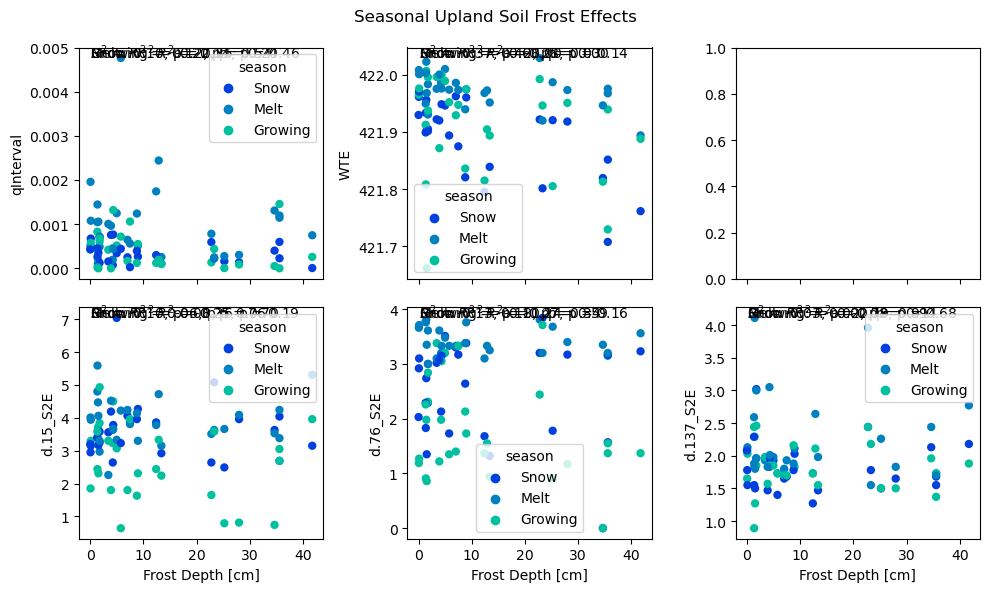

In [16]:
#Upland Frost Effects
fig, ax = plt.subplots(2, 3, figsize = (10, 6), 
                       sharex = True,
                       layout = 'tight')

data_merged_frost_lag0 = data_merged_frost[data_merged_frost.lag == 0]

plotScatter(data_merged_frost_lag0.courseMean, data_merged_frost_lag0.qInterval, data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_frost_lag0.courseMean, data_merged_frost_lag0.WTE, data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[0, 1], labels = True)
plotScatter(data_merged_frost_lag0.courseMean, data_merged_frost_lag0['d.15_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 0], labels = True)
plotScatter(data_merged_frost_lag0.courseMean, data_merged_frost_lag0['d.76_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 1], labels = True)
plotScatter(data_merged_frost_lag0.courseMean, data_merged_frost_lag0['d.137_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 2], labels = True)

plt.suptitle('Seasonal Upland Soil Frost Effects')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalSoilFrostEffects.pdf', 
            bbox_to_inches = 'tight')

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1491848450.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalSoilFrostEffects_Bog.pdf',


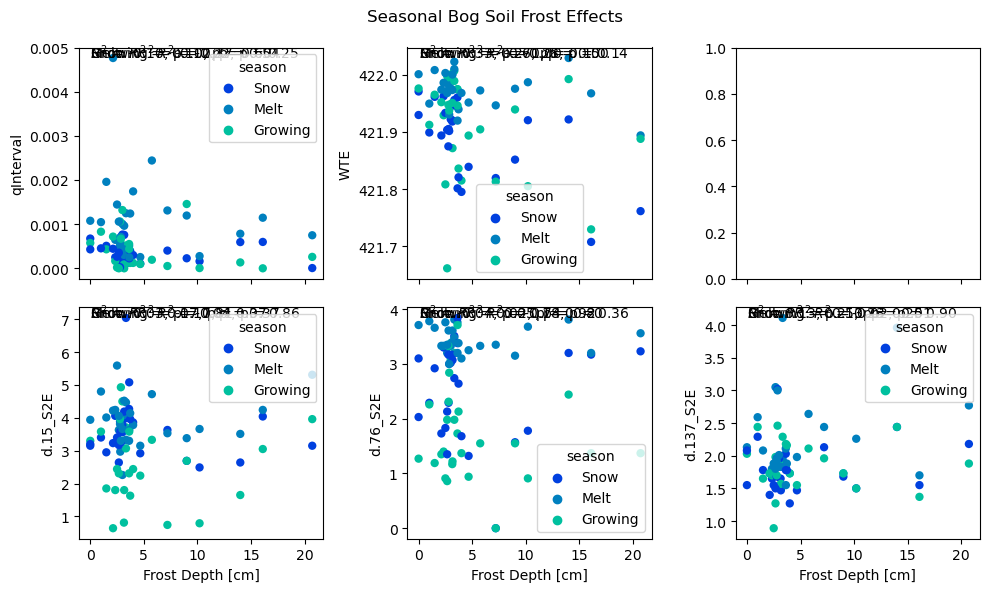

In [17]:
#Bog Frost Effects
fig, ax = plt.subplots(2, 3, figsize = (10, 6), 
                       sharex = True,
                       layout = 'tight')

data_merged_frost_lag0 = data_merged_frost[data_merged_frost.lag == 0]

plotScatter(data_merged_frost_lag0.frostThickness, data_merged_frost_lag0.qInterval, data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[0, 0], labels = True)
plotScatter(data_merged_frost_lag0.frostThickness, data_merged_frost_lag0.WTE, data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[0, 1], labels = True)
plotScatter(data_merged_frost_lag0.frostThickness, data_merged_frost_lag0['d.15_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 0], labels = True)
plotScatter(data_merged_frost_lag0.frostThickness, data_merged_frost_lag0['d.76_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 1], labels = True)
plotScatter(data_merged_frost_lag0.frostThickness, data_merged_frost_lag0['d.137_S2E'], data_merged_frost_lag0.season, 'Frost Depth [cm]', ax[1, 2], labels = True)

plt.suptitle('Seasonal Bog Soil Frost Effects')
plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalSoilFrostEffects_Bog.pdf', 
            bbox_to_inches = 'tight')

#### Correlations based on climate

In [18]:
data_merged_frost_lag0.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,...,d.137_S2S,lag,shiftedSeason,S21_FDpth,S22_FDpth,S23_FDpth,courseMean,depthToFrost,frostThickness,frostPercent
87,Snow,1985,29.57,0.000594,421.921834,38.5,-7.011834,2.64,3.76,3.20,...,4.72,0.0,Snow,26.5,25.60,16.183333,22.761111,2.75,14.000000,70.000000
88,Melt,1985,43.97,0.000782,422.029143,1.5,10.171429,3.51,4.32,3.81,...,5.03,0.0,Melt,26.5,25.60,16.183333,22.761111,2.75,14.000000,70.000000
89,Growing,1985,29.26,0.000133,421.992308,0.0,14.956044,1.65,2.16,2.44,...,4.11,0.0,Growing,26.5,25.60,16.183333,22.761111,2.75,14.000000,70.000000
96,Snow,1986,19.55,0.000107,421.955886,58.2,-8.062857,3.63,4.29,2.74,...,4.27,0.0,Snow,0.3,1.65,2.400000,1.450000,0.00,3.333333,36.666667
97,Melt,1986,28.56,0.000448,422.022653,0.0,11.392857,4.47,3.86,3.81,...,5.18,0.0,Melt,0.3,1.65,2.400000,1.450000,0.00,3.333333,36.666667


In [77]:
data_quadrats = data_merged_frost_lag0.reset_index(drop = True).dropna()

#means
meanTemp_snow = data_quadrats[data_quadrats.season == 'Snow']['MEANC'].median()
meanTemp_melt = data_quadrats[data_quadrats.season == 'Melt']['MEANC'].median()
meanTemp_grow = data_quadrats[data_quadrats.season == 'Growing']['MEANC'].median()
meanSnow = data_quadrats[data_quadrats.season == 'Snow']['Snow_in'].median()
meanPrecip_snow = data_quadrats[data_quadrats.season == 'Snow']['South_PCP'].median()
meanPrecip_melt = data_quadrats[data_quadrats.season == 'Melt']['South_PCP'].median()
meanPrecip_grow = data_quadrats[data_quadrats.season == 'Grow']['South_PCP'].median()
meanUpFrost = data_quadrats['courseMean'].median()
meanBogFrost = data_quadrats['frostThickness'].median()


#Dividing into halves
data_merged_frost['snowTempQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Snow']['MEANC'].transform(
    lambda x: 'High' if x > meanTemp_snow else 'Low')
data_merged_frost['meltTempQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Melt']['MEANC'].transform(
    lambda x: 'High' if x > meanTemp_melt else 'Low')
data_merged_frost['growTempQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Growing']['MEANC'].transform(
    lambda x: 'High' if x > meanTemp_grow else 'Low')

data_merged_frost['snowPrecipQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Snow']['South_PCP'].transform(
    lambda x: 'High' if x > meanPrecip_snow else 'Low')
data_merged_frost['meltPrecipQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Melt']['South_PCP'].transform(
    lambda x: 'High' if x > meanPrecip_melt else 'Low')
data_merged_frost['growPrecipQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Growing']['South_PCP'].transform(
    lambda x: 'High' if x > meanPrecip_grow else 'Low')

data_merged_frost['snowQuant'] = data_merged_frost[data_merged_frost.shiftedSeason == 'Snow']['Snow_in'].transform(
    lambda x: 'High' if x > meanSnow else 'Low')

data_merged_frost['upFrostQuant'] = data_merged_frost['courseMean'].transform(
    lambda x: 'High' if x > meanUpFrost else 'Low')
data_merged_frost['bogFrostQuant'] = data_merged_frost['frostThickness'].transform(
    lambda x: 'High' if x > meanBogFrost else 'Low')

#data_merged_frost = data_merged_frost.ffill()

data_merged_frost.head()

,season,year,South_PCP,qInterval,WTE,Snow_in,MEANC,d.15_S2E,d.15_S2S,d.76_S2E,...,frostPercent,snowTempQuant,meltTempQuant,growTempQuant,snowPrecipQuant,meltPrecipQuant,growPrecipQuant,snowQuant,upFrostQuant,bogFrostQuant
87,Snow,1985,29.57,0.000594,421.921834,38.5,-7.011834,2.64,3.76,3.20,...,70.0,Low,NaN,NaN,High,NaN,NaN,Low,High,High
88,Melt,1985,43.97,0.000782,422.029143,1.5,10.171429,3.51,4.32,3.81,...,70.0,NaN,Low,NaN,NaN,High,NaN,NaN,High,High
89,Growing,1985,29.26,0.000133,421.992308,0.0,14.956044,1.65,2.16,2.44,...,70.0,NaN,NaN,Low,NaN,NaN,Low,NaN,High,High
90,Snow,1985,21.40,0.000594,421.964731,0.0,16.236559,1.27,1.09,1.52,...,70.0,NaN,NaN,Low,NaN,NaN,Low,NaN,High,High
91,Melt,1985,29.57,0.000782,421.921834,38.5,-7.011834,2.64,3.76,3.20,...,70.0,Low,NaN,NaN,High,NaN,NaN,Low,High,High


In [112]:
def plotScatter_byQuad(data, x, y, colors, shape, label, labels = False):
    sns.relplot(data = data, x = x, y = y, hue = colors,
                    col = 'lag',
                    palette = 'winter',
                    linewidth = 0,
                    style = shape,
                    legend = labels, 
                    height = 2.5, 
                    aspect = 1)
    plt.ylim(0, 0.005)
    plt.xlim(min(data[x]), max(data[x]))
    plt.xlabel(label)
    _, _, r_value, p_value, _ = scipy.stats.linregress(data[x], data[y])
    plt.annotate(r"$R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(data[x]), 0.004))
    for i in set(data[colors]):
        for j in set(data[shape]):
            temp_x = data[(data[colors] == i) & (data[shape] == j)][x]
            temp_y = data[(data[colors] == i) & (data[shape] == j)][y]
            if((len(temp_x) > 0) & (len(temp_y) > 0)):
                _, _, r_value, p_value, _ = scipy.stats.linregress(temp_x, temp_y)
                plt.annotate(i + ", " + j + r": $R^2$ = {:.2f}, p = {:.2f}".format(r_value, p_value), (min(data[x]), 0.004))
    
    plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf', 
            bbox_to_inches = 'tight')
    plt.show()

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


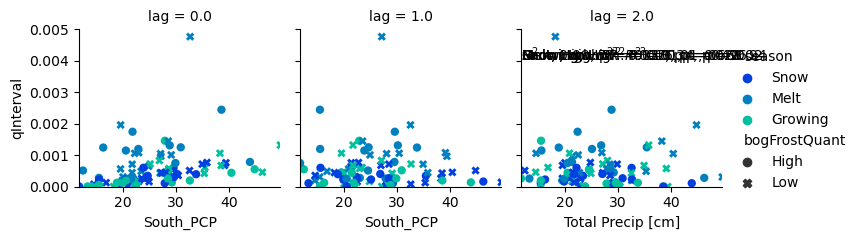

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


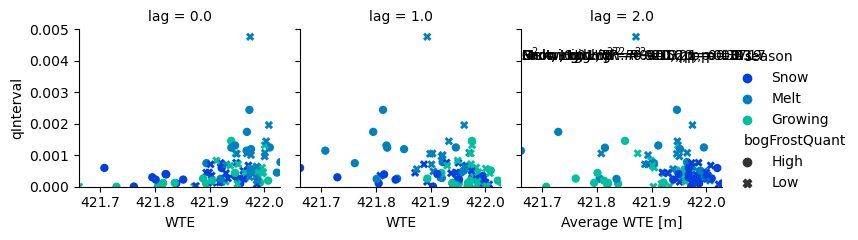

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


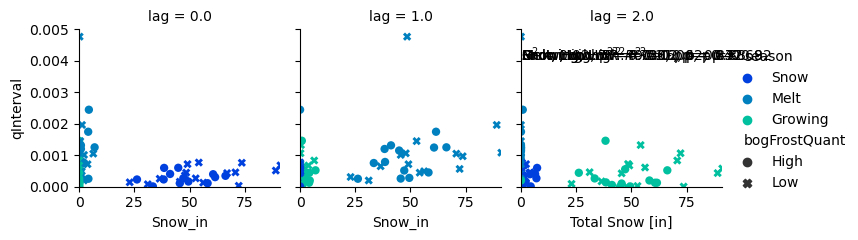

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


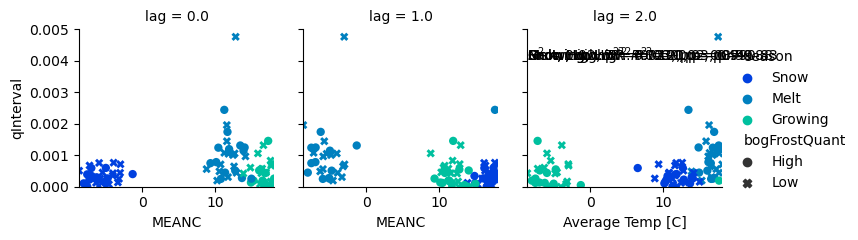

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


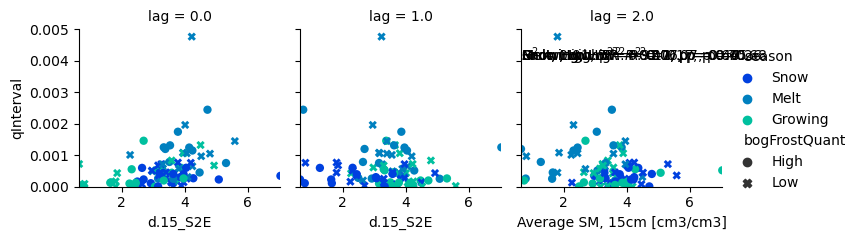

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


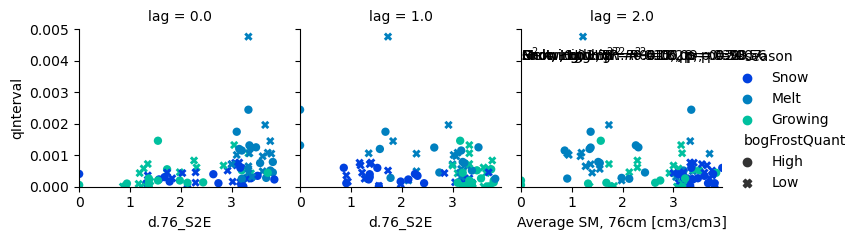

C:\Users\jone3247\AppData\Local\Temp\ipykernel_4572\1727934779.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Figures/Variable Exploration Plots/Lag Correlation Plots/SeasonalStreamflowDrivers_nolag_allSeasons_' + x + '_' + shape + '.pdf',


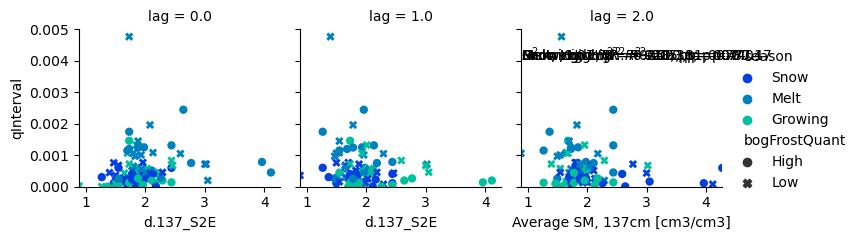

In [118]:
#Plots of seasonal variables affecting streamflow - single lag (0)
plotScatter_byQuad(data_merged_frost, 'South_PCP', 'qInterval', 'season', 'bogFrostQuant',
            'Total Precip [cm]', labels = True)
plotScatter_byQuad(data_merged_frost, 'WTE', 'qInterval', 'season', 'bogFrostQuant',
            'Average WTE [m]', labels = True)
plotScatter_byQuad(data_merged_frost, 'Snow_in', 'qInterval', 'season', 'bogFrostQuant',
            'Total Snow [in]', labels = True)
plotScatter_byQuad(data_merged_frost, 'MEANC', 'qInterval', 'season', 'bogFrostQuant',
            'Average Temp [C]', labels = True)
plotScatter_byQuad(data_merged_frost, 'd.15_S2E', 'qInterval', 'season', 'bogFrostQuant',
            'Average SM, 15cm [cm3/cm3]', labels = True)
plotScatter_byQuad(data_merged_frost, 'd.76_S2E', 'qInterval', 'season', 'bogFrostQuant',
            'Average SM, 76cm [cm3/cm3]', labels = True)
plotScatter_byQuad(data_merged_frost, 'd.137_S2E', 'qInterval', 'season', 'bogFrostQuant',
            'Average SM, 137cm [cm3/cm3]', labels = True)